In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [9]:
BOND_DIR = 'D:/Data/assets/bond'
treasury_file = '%s/treasury.xlsx'%(BOND_DIR)

In [10]:
df = pd.read_excel('%s/price.xlsx'%(BOND_DIR))

In [11]:
df.tail()

,881001.WI,CBA00102.CS
2019-03-21,4246.9516,100.0352
2019-03-22,4254.6575,100.0685
2019-03-25,4183.1487,100.1257
2019-03-26,4102.6560,100.1537
2019-03-27,4102.6560,100.1537


In [12]:
df = df.dropna()

In [13]:
df['corr'] = df.pct_change()['881001.WI'].rolling(window=243).corr(df.pct_change()['CBA00102.CS'])

In [16]:
tdf = pd.read_excel(treasury_file, index_col=0, sheet_name='china')

In [17]:
df = df.merge(tdf, how='inner', left_index=True, right_index=True)

In [18]:
df = df.dropna()

In [23]:
df = df[df.index >= '2006-01-01']

In [24]:
df.tail()

,881001.WI,CBA00102.CS,corr,CGB3M,CGB1Y,CGB10Y
2019-03-20,4221.3026,100.0181,-0.203032,2.1546,2.4698,3.1820
2019-03-21,4246.9516,100.0352,-0.202405,2.1536,2.4498,3.1662
2019-03-22,4254.6575,100.0685,-0.201242,2.1446,2.4655,3.1442
2019-03-25,4183.1487,100.1257,-0.178581,2.1062,2.4795,3.1167
2019-03-26,4102.6560,100.1537,-0.179227,2.0915,2.4706,3.0973


[Text(1,0,'  2%'),
 Text(1,0,'  3%'),
 Text(1,0,'  4%'),
 Text(1,0,'  4%'),
 Text(1,0,'  4%'),
 Text(1,0,'  5%')]

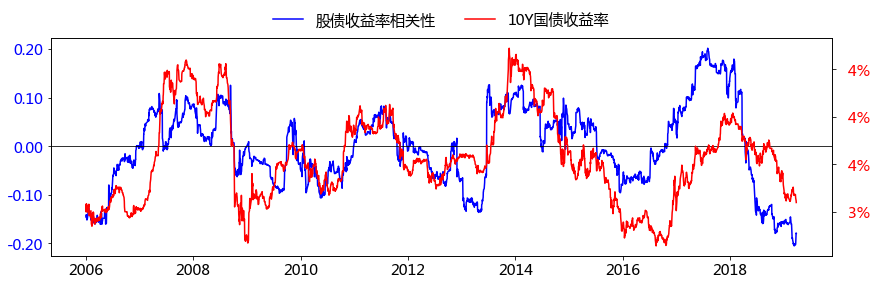

In [32]:
fig, ax = plt.subplots(figsize=(14, 4))

lns1 = ax.plot(df['corr'], color='blue', label=u'股债收益率相关性')
axx = ax.twinx()
lns2 = axx.plot(df['CGB10Y'], color='red', label=u'10Y国债收益率')

# zero line
ax.axhline(y=0, color='black', linewidth=0.8)

# Legend
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, fontsize=15, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.18))

# Axis
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
axx.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals], color='blue')
vals = axx.get_yticks()
axx.set_yticklabels(['{:3.0f}%'.format(x) for x in vals], color='red')